# Grouping My Personal Spotify Library

I wanted to take a closer look at my personal spotify library and try to find any interesting groupings or clusters that would be usefull when creating playlist. 

This analysis is focused on clustering and exploring the attributes behind the music I listen to. With these models, I hope to strategically and quickly create playlists with songs more similar to eachother based off songs in my current library. 

## The Data
The data is collected using a spotify API connection library in python. I saved the data into a .csv file and use pandas for handling. 

Most of the features are numeric values that rate and measure certain attributes of each track. For example: 'Danceability (float) describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this:Danceability distribution'.

In [2]:
import pandas as pd
df = pd.read_c?sv("C:/Users/jbaskerville/Desktop/JohnBaskervilleGitRepos/SpotifyClustering/Juypter Notebooks/spotifyLibrary.csv", encoding='utf-8')
df.head()

SyntaxError: invalid syntax (<ipython-input-2-e9747ed690ca>, line 2)

In [3]:
df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1546.0,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1.546000e+03,1546.000000
mean,0.0,0.694001,0.635506,5.154592,-6.842761,0.550453,0.159082,0.172590,0.046865,0.190313,0.440288,124.822257,2.196170e+05,3.974774
std,0.0,0.146338,0.159924,3.638170,2.444221,0.497609,0.131273,0.197361,0.159087,0.140855,0.223067,27.460047,5.721245e+04,0.261952
min,0.0,0.157000,0.109000,0.000000,-21.447000,0.000000,0.024400,0.000025,0.000000,0.016000,0.026600,55.679000,5.564000e+04,1.000000
25%,0.0,0.598000,0.529000,1.000000,-8.163750,0.000000,0.051500,0.024400,0.000000,0.101000,0.265000,103.955000,1.865490e+05,4.000000
50%,0.0,0.708000,0.636000,5.000000,-6.567000,1.000000,0.107000,0.092100,0.000004,0.134000,0.417500,125.990000,2.138250e+05,4.000000
75%,0.0,0.805750,0.750000,8.000000,-5.188750,1.000000,0.247000,0.258000,0.001450,0.237750,0.599000,142.977250,2.467598e+05,4.000000
max,0.0,0.980000,0.994000,11.000000,-0.283000,1.000000,0.855000,0.944000,0.973000,0.966000,0.980000,215.593000,1.146163e+06,5.000000


## Data exploration and actions taken for data cleaning
For data cleaning, I elimintated a few non-float varibles like 'href' and 'id' which wouldnt help the clustering algorithm. After all the numeric data were identified, one of the first exploration techniques I use to understand the data involves looking at the feature correlations. If I wasnt using PCA later on, I would consider the correlation between loudness and energy as 'high' and look at alternative feature engineering techniques.Next, I fed the data through a pipeline that systematically log transformed and scaled the data using MinMaxScaler and numpy.log1p().

In [5]:
import seaborn as sns
numeric_data = [x for x in df.columns if x not in ["key","mode","time_signature",
                                                   "type","uri","id","track_href","Unnamed: 0",
                                                   "analysis_url"]]
numeric_data_df = df[numeric_data].set_index(df['id'])

In [6]:
numeric_data_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

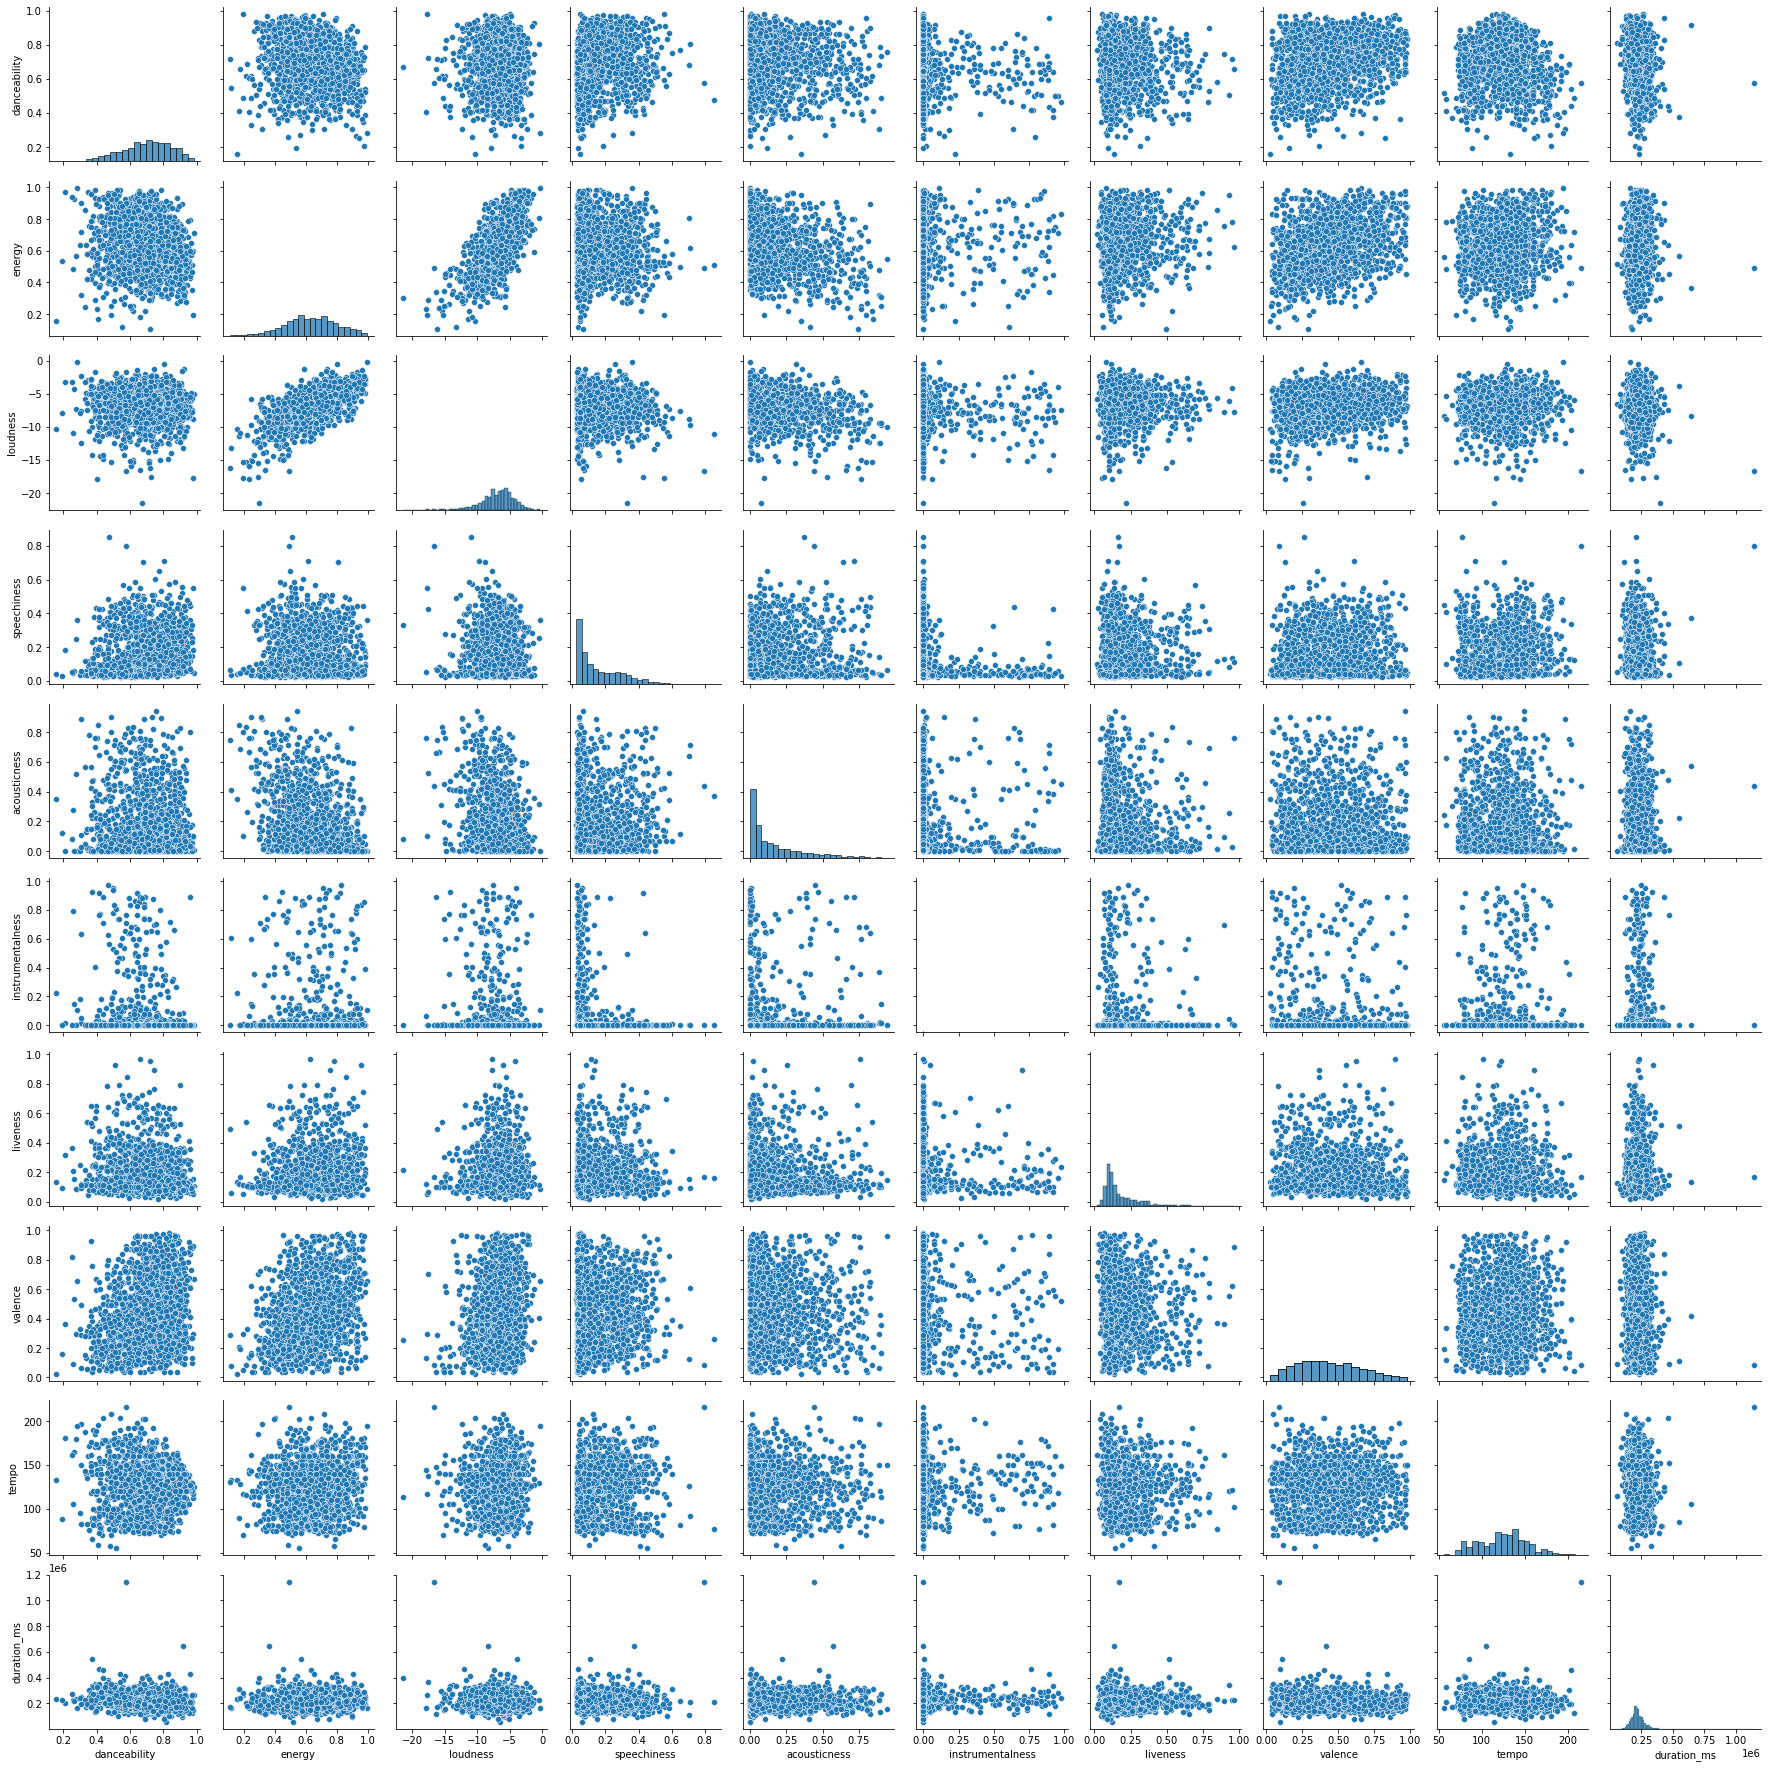

In [8]:
sns.pairplot(numeric_data_df);

# Training
## K-Means.
The first model I created was k-means with number of clusters set to 4. As expected the 4 playlists created were very large and not very useful but I found it interesting their sizes varied from 82-635.

Next I wanted to look at inertia (tightness of clusters) and try to create playlists with clusters of smaller inertia keeping in mind there are over 1,500 records. I found the inertia for 1 cluster all the way through 50 clusters. and plotted on a graph.

The inertia is lowest with the model that finds 50 clusters and the range of songs in the created playlist was 11-56. When I look at the playlists created I found similarities in the songs that were grouped together. I also found duplicates in a few of the playlists which gave me confidence in the clustering algorithm.

## Mean-Shift.
The second model implemented was a mean-shift algorithm where the number of clusters was decided by the model and the parameter 'quantile' (0-1) was tuned to 0.1. The 10 playlists created were a little similar in size ranging from 82-247.

### KPCA Dimensionality Reduction.
The last models I trained used data with fewer features and experimented with deminsionality reduction using Kernel PCA. I experimented with data that ranged from 1-10 features and viewed the outputed playlists to try and find any interesting playlist combinations. I was able to find a a lot of uniqe playlist that grouped songs with similar sounds together. My library is mostly hip hop and rap but the latest models were able to put groups of songs together that were not typical sound of the overall library.

# Final model
The best model is K-Means for this application because the user will have the biggest control over playlist size and k-means gernerally groups songs in similar cluster sizes. After investigating the playlists, the k-means model was able to create reliable groups of songs that I would consider putting into my library for personal use.

# Summary - Key Findings, Insights and Next Steps 
I found skipping the log tranformation step made the k-means model more likely to pick out and place 'the beep test'(a unique running exercise saved as a song) into its own cluster of 1 song. Implementing the log transformation to the data caused a more smooth and rounded set of playlist but track was incorrectly grouped together with other songs while it felt more like an outlier.

I found it incouraging that multiple songs made by the same artists made it into the same playlist and outlier songs were picked out.

#### Next Steps
* Implementing a Playlist name creator using NLP that would name the playlist based on the highest rated feature along with song names.
* Find a reliable source of play counts that could be used as an additional weighted feature. 
* Put the newly created playlists back onto my spotify account 

#### Sample Playlist:

# Import data

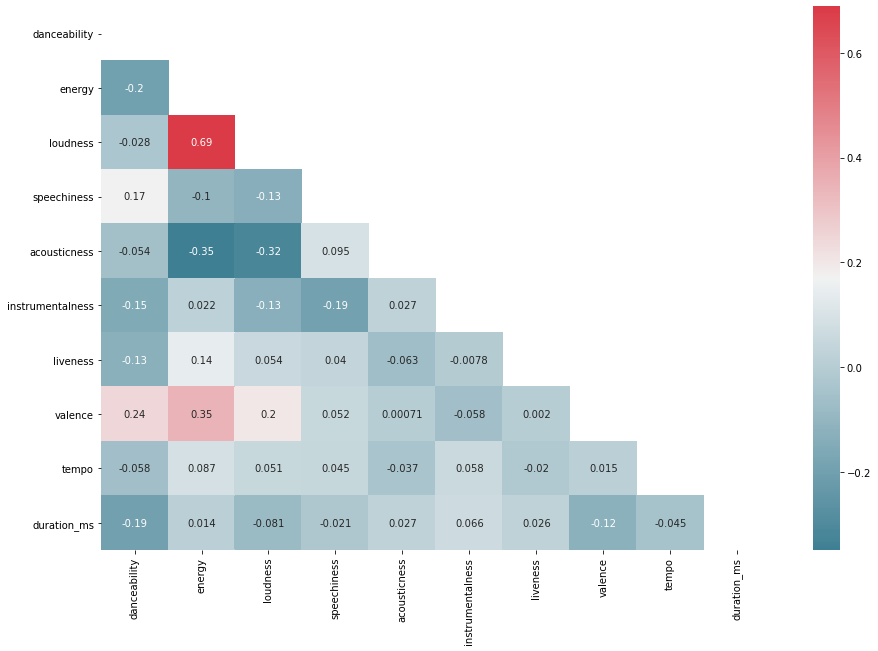

In [8]:
import pandas as pd
df = pd.read_csv("spotifyLibrary.csv", encoding='utf-8')

numeric_data = [x for x in df.columns if x not in ["key","mode","time_signature",
                                                   "type","uri","id","track_href","Unnamed: 0",
                                                   "analysis_url"]]

numeric_data_df = df[numeric_data].set_index(df['id'])
numeric_data_df

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#create figure for heatmap plot
plt.figure(figsize = (15,10)) # width x height

corr = numeric_data_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
#use heatmatp function to visualize correlations
corrHeatmap = sns.heatmap(corr, mask= mask, cmap=cmap,annot=True)

In [9]:
# numeric_data_df.describe()

In [9]:
#rank  correlated values in descending order
for x in range(len(corr)):
    corr.iloc[x,x] = 0.0
    
corr.abs().max().sort_values(ascending=False)

loudness            0.688568
energy              0.688568
acousticness        0.348342
valence             0.346454
danceability        0.243235
duration_ms         0.194723
instrumentalness    0.192787
speechiness         0.192787
liveness            0.142002
tempo               0.086775
dtype: float64

# Adressing Skewed Data

In [10]:
# #Create a pairplot of the original data to get an idea of shape and distribution of features
# sns.set_context('notebook')
# sns.set_style('white')
# sns.pairplot(numeric_data_df);

## Columns with skew greater than 0.75

In [11]:
# print out features with skew greater than 0.75.
skew_columns = numeric_data_df.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

instrumentalness    3.958237
duration_ms         3.598150
liveness            1.988694
acousticness        1.469725
speechiness         1.171856
dtype: float64

In [13]:
import numpy as np
from scipy import stats

#t_data_df will be the transformed data for addressing skewness
t_data_df = numeric_data_df.copy()
#(numeric_data_df.instrumentalness).unique().size
#np.sqrt(numeric_data_df.instrumentalness).hist()
t_data_df['instrumentalness'] = t_data_df['instrumentalness'].replace(0,0.0000001)
t_data_df['instrumentalness'] = stats.boxcox(t_data_df['instrumentalness'])[0]
t_data_df['duration_ms'] = np.log(t_data_df['duration_ms'])
t_data_df['liveness'] = np.log(t_data_df['liveness'])
t_data_df['acousticness'] = stats.boxcox(t_data_df['acousticness'])[0]
t_data_df['speechiness'] = np.log(t_data_df['speechiness'])

In [14]:
skew_columns = t_data_df.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Series([], dtype: float64)

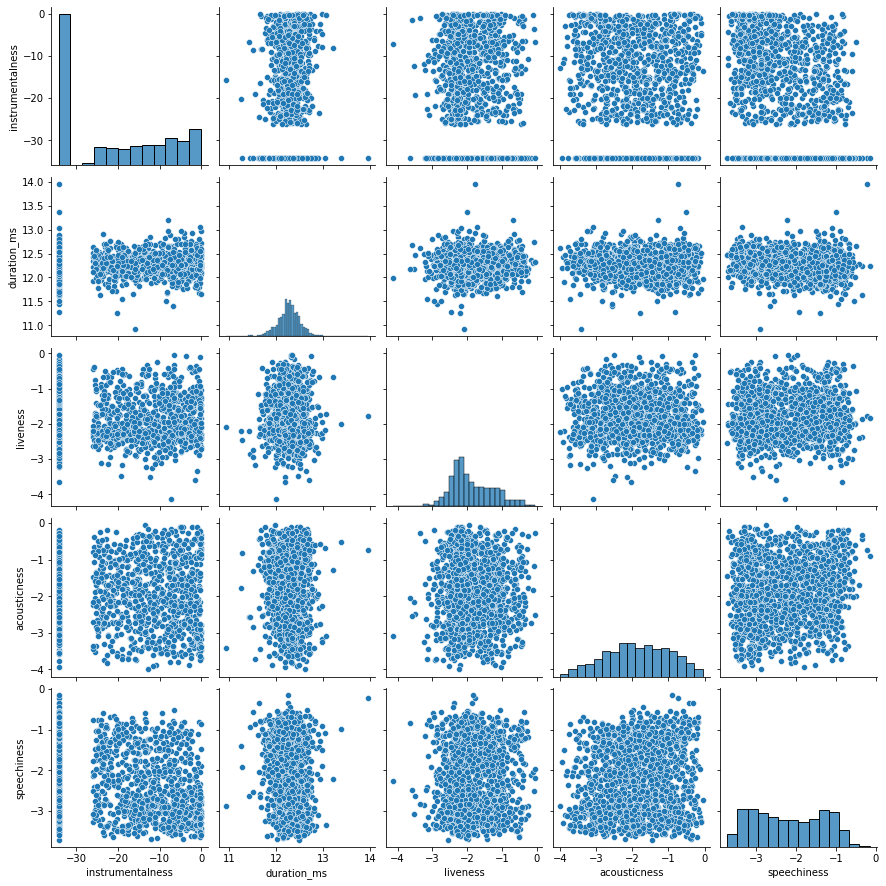

In [15]:
# t_data_df['instrumentalness'].skew()
# (t_data_df['duration_ms']).skew()
# (t_data_df['liveness']).skew()
# (t_data_df['acousticness']).skew()
skew_data = ['instrumentalness','duration_ms','liveness','acousticness','speechiness']
sns.pairplot(t_data_df[skew_data])

# Scaling Features

In [16]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaledFeatures = sc.fit_transform(t_data_df)
scaledFeatures_df = pd.DataFrame(scaledFeatures, index=t_data_df.index, columns=t_data_df.columns)
scaledFeatures_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
7aNW0M1R6eUnoXKpN2HncV,0.606318,0.549153,0.700246,0.055269,0.345602,0.000000,0.650028,0.558422,0.371356,0.441606
5bzXWaxInedSVFe7w18hgf,0.475091,0.532203,0.652523,0.007953,0.458502,0.872579,0.657340,0.439899,0.202096,0.359933
2Wp2IjSLARq1XaoIMaDgCp,0.656136,0.475706,0.628284,0.717449,0.274636,0.000000,0.442975,0.464023,0.126149,0.395195
0b18g3G5spr4ZCkz7Y6Q0Q,0.730255,0.908475,0.875118,0.430985,0.210413,0.570813,0.607257,0.662261,0.452499,0.399294
4Hff1IjRbLGeLgFgxvHflk,0.732685,0.883616,0.736864,0.118578,0.371910,0.921640,0.713194,0.985316,0.403873,0.489991
...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.591738,0.418079,0.618739,0.557165,0.643754,0.000000,0.899219,0.614013,0.151644,0.389329
3Z2sglqDj1rDRMF5x0Sz2R,0.383961,0.397740,0.707475,0.734865,0.622740,0.000000,0.440233,0.617160,0.689783,0.475107
14Rcq31SafFBHNEwXrtR2B,0.752126,0.343503,0.661926,0.382789,0.219827,0.506200,0.368148,0.273128,0.277174,0.466046


## K-Means

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

km = KMeans(n_clusters=3,random_state=42)
km = km.fit(scaledFeatures_df)

df['kmeans'] = km.predict(scaledFeatures_df)

df.groupby(['kmeans']).size()

kmeans
0    408
1    347
2    791
dtype: int64

In [18]:
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, scaledFeatures_df)
scaledFeatures_df.iloc[closest]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
43nBJsVLjMDqL266IlPKif,0.585662,0.749153,0.731998,0.310815,0.387019,0.838700,0.532422,0.508076,0.627887,0.430740
4bOr88BuLILM22g8FKQWrG,0.642770,0.485876,0.568843,0.373175,0.870783,0.696628,0.528963,0.349696,0.426792,0.457624
0ESJlaM8CE1jRWaNtwSNj8,0.712029,0.522034,0.727320,0.501094,0.705541,0.000000,0.707397,0.491294,0.396307,0.445062


In [19]:
df.loc[closest,'kmeans'] = 3
df['size'] = 10
df.loc[closest,'size'] = 30

In [20]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaledFeatures_df)

fig = px.scatter(components, x=0, y=1, color= df['kmeans'])

fig.update_traces(marker=dict(size=df['size']),
                  selector=dict(mode='markers'))
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [17]:
pca = PCA(n_components=3)
components = pca.fit_transform(scaledFeatures_df)

fig = px.scatter_3d(components, x=0, y=1,z=2, color= df['kmeans'])

fig.update_traces(marker=dict(size=df['size']),
                  selector=dict(mode='markers'))
fig.show()

In [18]:
# # #create and fit a range of models
# km_list = list()

# for clust in range(1,50):
#     km = KMeans(n_clusters = clust, random_state=42)
#     km = km.fit(scaledFeatures_df)
#     km_list.append(pd.Series({
#         'clusters':clust,
#         'inertia':km.inertia_,
#         'model':km
#     }))
    
# plot_data = (pd.concat(km_list,axis=1)
#         .T[['clusters','inertia']]
#         .set_index('clusters'))

# ax = plot_data.plot(marker='o',ls='-')
# ax.set_xticks(range(0,51,2))
# ax.set_xlim(0,51)
# ax.set(xlabel='Cluster',ylabel='Inertia')

# Which songs are closest to the center points of the 3 clusters?

In [19]:
scaledFeatures_df.iloc[closest]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
43nBJsVLjMDqL266IlPKif,0.585662,0.749153,0.731998,0.310815,0.387019,0.838700,0.532422,0.508076,0.627887,0.430740
4bOr88BuLILM22g8FKQWrG,0.642770,0.485876,0.568843,0.373175,0.870783,0.696628,0.528963,0.349696,0.426792,0.457624
0ESJlaM8CE1jRWaNtwSNj8,0.712029,0.522034,0.727320,0.501094,0.705541,0.000000,0.707397,0.491294,0.396307,0.445062


In [20]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
username= 'john3baskerville'
token = util.prompt_for_user_token(username,
                           'user-library-read',
                           client_id='97537d196d1345ecb17c19537d54174a',
                           client_secret='003cf70c6be14a9e991e75f52930c5e3',
                           redirect_uri='http://localhost:8080')

sp = spotipy.Spotify(auth=token)

In [21]:
# tracks = sp.tracks(minPlaylist[:50])
# for value in tracks['tracks']:
#     print(value['name'],"-", value['artists'][0]['name'])
songIds = df['id'][df['kmeans'] == 3]

tracks = sp.tracks(songIds)

for value in tracks['tracks']:
    print(value['name'])
    for artist in value['artists']:
        print(" " + artist['name'])

Stand Off
 MEMBA
 Ehiorobo
Will He (Medasin Remix)
 Joji
 Medasin
beibs in the trap
 Travis Scott


In [22]:
df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'kmeans', 'size'],
      dtype='object')

<AxesSubplot:xlabel='valence', ylabel='Count'>

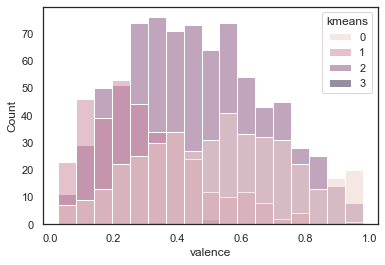

In [23]:
sns.histplot(x='valence',data = df, hue="kmeans")

## Mean Shift

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(scaledFeatures_df, quantile=.03, n_samples=1500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msFit = ms.fit(scaledFeatures_df)
df['meanshift'] = msFit.predict(scaledFeatures_df)
df.groupby(['meanshift']).size().to_frame

<bound method Series.to_frame of meanshift
0    760
1    638
2     16
3     32
4     46
5      2
6     12
7     33
8      7
dtype: int64>

In [25]:
pca = PCA(n_components=3)
components = pca.fit_transform(scaledFeatures_df)

fig = px.scatter_3d(components, x=0, y=1,z=2, color = df['meanshift'])
fig.show()

ValueError: array must not contain infs or NaNs

### Pipeline Transformations

In [ ]:
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.pipeline import Pipeline

# #custom log transformer
# log_transformer = FunctionTransformer(np.log1p)

# #Pipeline
# estimators = [('minmaxscale', MinMaxScaler())]
# pipeline = Pipeline(estimators)

# #convert Original data using the newly created pipeline from above
# pipe_data = pipeline.fit_transform(numeric_data_df)
# data_pipe_df = pd.DataFrame(data_pipe, index=numeric_data_df.index, columns=PipeData.columns)

## KPCA

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):
    try:
        X_val = X.values
    except:
        X_val = X
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4,5,6,7,8,9,10]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)

kpca_list = list()
kpcafeature_weight_list = list()

for n in range(1,11):
    kPCAmod = KernelPCA(kernel='linear',n_components=n, fit_inverse_transform=True)
    # Calculate and inverse transform the data
    data_inv = kPCAmod.fit(scaledFeatures_df).transform(scaledFeatures_df)
    data_inv = kPCAmod.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), scaledFeatures_df.values.ravel())
    
    kpca_list.append(pd.Series({'n':n,'model':kPCAmod,'mse':mse}))
    kpca_df = pd.concat(kpca_list,axis=1).T.set_index('n')
kpca_df

In [ ]:
kpca_data = kpca_list[0].model.fit(scaledFeatures).transform(scaledFeatures_df)

In [ ]:
kpca_data.shape

In [ ]:
kpca = KernelPCA(n_components=3)
kpcacomponents = kpca.fit_transform(scaledFeatures_df)

fig = px.scatter_3d(kpcacomponents, x=0, y=1,z=2, color = df['kmeans'])
fig.show()

In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

for n in range(1,11):
    PCAmod = PCA(n_components=n)
    PCAmod.fit(scaledFeatures_df)
    
    pca_list.append(pd.Series({'values':PCAmod.singular_values_,'n':n,'model':PCAmod,'var':PCAmod.explained_variance_ratio_.sum()}))

    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_contribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contribution.sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,'features':scaledFeatures_df.columns,'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list,axis=1).T.set_index('n')
pca_df

In [ ]:
#import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# import spotipy.util as util
# username= 'john3baskerville'
# token = util.prompt_for_user_token(username,
#                            'user-library-read',
#                            client_id='97537d196d1345ecb17c19537d54174a',
#                            client_secret='003cf70c6be14a9e991e75f52930c5e3',
#                            redirect_uri='http://localhost:8080')

# sp = spotipy.Spotify(auth=token)


# tracks = sp.tracks(minPlaylist[:50])

# for value in tracks['tracks']:
#     print(value['name'],"-", value['artists'][0]['name'])

#minPlaylist = scaledFeatures_df[scaledFeatures_df['KPCAMeanShift'] == 1].index

# username= 'john3baskerville'
# token = util.prompt_for_user_token(username,
#                            'user-library-read',
#                            client_id='97537d196d1345ecb17c19537d54174a',
#                            client_secret='003cf70c6be14a9e991e75f52930c5e3',
#                            redirect_uri='http://localhost:8080')

# sp = spotipy.Spotify(auth=token)


# tracks = sp.tracks(minPlaylist[:25])

# for value in tracks['tracks']:
#     print(value['name'])
#     for artist in value['artists']:
#         print(" " + artist['name'])

In [ ]:
# -*- coding: utf-8 -*-

from traitlets.config import Config
import nbformat as nbf
from nbconvert.exporters import HTMLExporter
from nbconvert.preprocessors import TagRemovePreprocessor

# Setup config
c = Config()

# Configure tag removal - be sure to tag your cells to remove  using the
# words remove_cell to remove cells. You can also modify the code to use
# a different tag word
c.TagRemovePreprocessor.remove_cell_tags = ("remove_cell",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ('remove_output',)
c.TagRemovePreprocessor.remove_input_tags = ('remove_input',)
c.TagRemovePreprocessor.enabled = True

# Configure and run out exporter
c.HTMLExporter.preprocessors = ["nbconvert.preprocessors.TagRemovePreprocessor"]

exporter = HTMLExporter(config=c)
exporter.register_preprocessor(TagRemovePreprocessor(config=c),True)

# Configure and run our exporter - returns a tuple - first element with html,
# second with notebook metadata
output = HTMLExporter(config=c).from_filename("Unsupervised Learning Project - Final.ipynb")

# Write to output html file
with open("Unsupervised Learning Project - Final.html",  "w", encoding="utf-8") as f:
    f.write(output[0])

## long description of the data 
### duration_ms
int	The duration of the track in milliseconds.
### acousticness
float	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:Acousticness distribution
### danceability
float	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this:Danceability distribution
### energy
float	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this:Energy distribution
### instrumentalness
float	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:Instrumentalness distribution
### liveness
float	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this:Liveness distribution
### loudness
float	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this:Loudness distribution
### speechiness
float	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like this:Speechiness distribution
### valence
float	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this:Valence distribution
### tempo
float	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this:Tempo distribution